# Vocabulary and Definitions
https://runestone.academy/runestone/books/published/pythonds/Graphs/VocabularyandDefinitions.html


__Vertex__
A vertex (also called a “node”) is a fundamental part of a graph. It can have a name, which we will call the “key.” A vertex may also have additional information. We will call this additional information the “payload.”

__Edge__
An edge (also called an “arc”) is another fundamental part of a graph. An edge connects two vertices to show that there is a relationship between them. Edges may be one-way or two-way. If the edges in a graph are all one-way, we say that the graph is a directed graph, or a digraph. The class prerequisites graph shown above is clearly a digraph since you must take some classes before others.

__Weight__
Edges may be weighted to show that there is a cost to go from one vertex to another. For example in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.

With those definitions in hand we can formally define a graph. A graph can be represented by 𝐺 where 𝐺=(𝑉,𝐸). For the graph 𝐺, 𝑉 is a set of vertices and 𝐸 is a set of edges. Each edge is a tuple (𝑣,𝑤) where 𝑤,𝑣∈𝑉. We can add a third component to the edge tuple to represent a weight. A subgraph 𝑠 is a set of edges 𝑒 and vertices 𝑣 such that 𝑒⊂𝐸 and 𝑣⊂𝑉.

Figure  2 shows another example of a simple weighted digraph. Formally we can represent this graph as the set of six vertices:
__𝑉={𝑉0,𝑉1,𝑉2,𝑉3,𝑉4,𝑉5}__

and the set of nine edges:
__𝐸={(𝑣0,𝑣1,5),(𝑣1,𝑣2,4),(𝑣2,𝑣3,9),(𝑣3,𝑣4,7),(𝑣4,𝑣0,1),(𝑣0,𝑣5,2),(𝑣5,𝑣4,8),(𝑣3,𝑣5,3),(𝑣5,𝑣2,1)}__

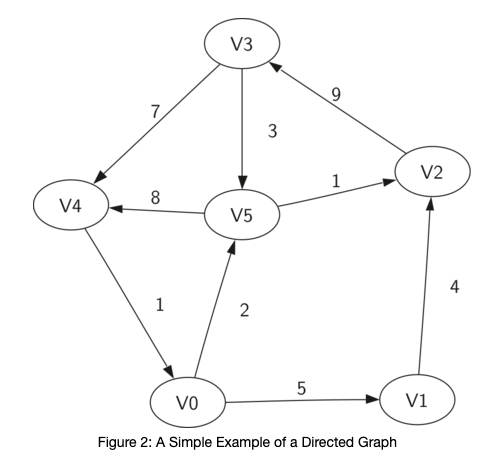


__Path__
A path in a graph is a sequence of vertices that are connected by edges. Formally we would define a path as 𝑤1,𝑤2,...,𝑤𝑛 such that (𝑤𝑖,𝑤𝑖+1)∈𝐸 for all 1≤𝑖≤𝑛−1. The unweighted path length is the number of edges in the path, specifically 𝑛−1. The weighted path length is the sum of the weights of all the edges in the path. For example in Figure 2 the path from 𝑉3 to 𝑉1 is the sequence of vertices (𝑉3,𝑉4,𝑉0,𝑉1). The edges are {(𝑣3,𝑣4,7),(𝑣4,𝑣0,1),(𝑣0,𝑣1,5)}.

__Cycle__
A cycle in a directed graph is a path that starts and ends at the same vertex. For example, in Figure 2 the path (𝑉5,𝑉2,𝑉3,𝑉5) is a cycle. A graph with no cycles is called an acyclic graph. A directed graph with no cycles is called a directed acyclic graph or a DAG. We will see that we can solve several important problems if the problem can be represented as a DAG.

# An Adjacency Matrix
One of the easiest ways to implement a graph is to use a two-dimensional matrix. In this matrix implementation, each of the rows and columns represent a vertex in the graph. The value that is stored in the cell at the intersection of row 𝑣 and column 𝑤 indicates if there is an edge from vertex 𝑣 to vertex 𝑤. When two vertices are connected by an edge, we say that they are adjacent. Figure 3 illustrates the adjacency matrix for the graph in Figure 2. A value in a cell represents the weight of the edge from vertex 𝑣 to vertex 𝑤.

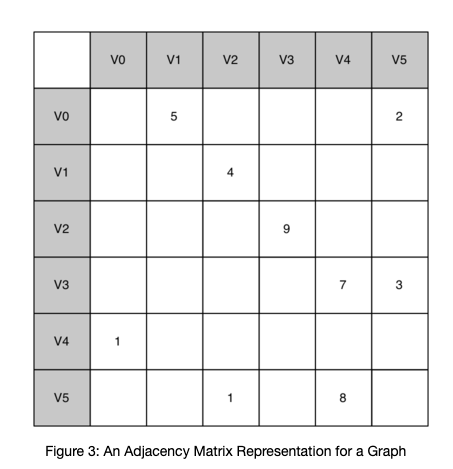

The advantage of the adjacency matrix is that it is simple, and for small graphs it is easy to see which nodes are connected to other nodes. However, notice that most of the cells in the matrix are empty. Because most of the cells are empty we say that this matrix is “sparse.” A matrix is not a very efficient way to store sparse data. In fact, in Python you must go out of your way to even create a matrix structure like the one in Figure 3.

The adjacency matrix is a good implementation for a graph when the number of edges is large. But what do we mean by large? How many edges would be needed to fill the matrix? Since there is one row and one column for every vertex in the graph, the number of edges required to fill the matrix is |𝑉|2. A matrix is full when every vertex is connected to every other vertex. There are few real problems that approach this sort of connectivity. The problems we will look at in this chapter all involve graphs that are sparsely connected.

# An Adjacency List
A more space-efficient way to implement a sparsely connected graph is to use an adjacency list. In an adjacency list implementation we keep a master list of all the vertices in the Graph object and then each vertex object in the graph maintains a list of the other vertices that it is connected to. In our implementation of the Vertex class we will use a dictionary rather than a list where the dictionary keys are the vertices, and the values are the weights. Figure 4 illustrates the adjacency list representation for the graph in Figure 2.

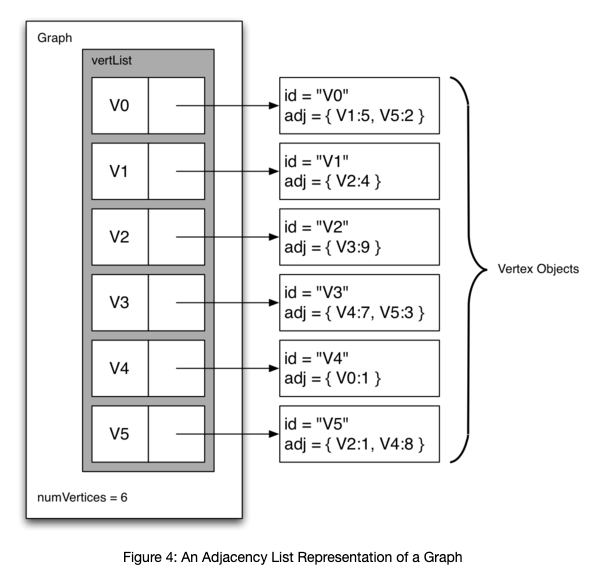

The advantage of the adjacency list implementation is that it allows us to compactly represent a sparse graph. The adjacency list also allows us to easily find all the links that are directly connected to a particular vertex.

### Implementation

Using dictionaries, it is easy to implement the adjacency list in Python. In our implementation of the Graph abstract data type we will create two classes (see Listing 1 and Listing 2), Graph, which holds the master list of vertices, and Vertex, which will represent each vertex in the graph.

Each Vertex uses a dictionary to keep track of the vertices to which it is connected, and the weight of each edge. This dictionary is called connectedTo. The listing below shows the code for the Vertex class. The constructor simply initializes the id, which will typically be a string, and the connectedTo dictionary. The addNeighbor method is used add a connection from this vertex to another. The getConnections method returns all of the vertices in the adjacency list, as represented by the connectedTo instance variable. The getWeight method returns the weight of the edge from this vertex to the vertex passed as a parameter.

The Graph class, shown in the next listing, contains a dictionary that maps vertex names to vertex objects. In Figure 4 this dictionary object is represented by the shaded gray box. Graph also provides methods for adding vertices to a graph and connecting one vertex to another. The getVertices method returns the names of all of the vertices in the graph. In addition, we have implemented the __iter__ method to make it easy to iterate over all the vertex objects in a particular graph. Together, the two methods allow you to iterate over the vertices in a graph by name, or by the objects themselves.

Using the Graph and Vertex classes just defined, the following Python session creates the graph in Figure 2. First we create six vertices numbered 0 through 5. Then we display the vertex dictionary. Notice that for each key 0 through 5 we have created an instance of a Vertex. Next, we add the edges that connect the vertices together. Finally, a nested loop verifies that each edge in the graph is properly stored. You should check the output of the edge list at the end of this session against Figure 2.

In [2]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

In [3]:
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

In [5]:
g = Graph()
for i in range(6):
    g.addVertex(i)
g.vertList

g.addEdge(0,1,5)

### The Word Ladder Problem

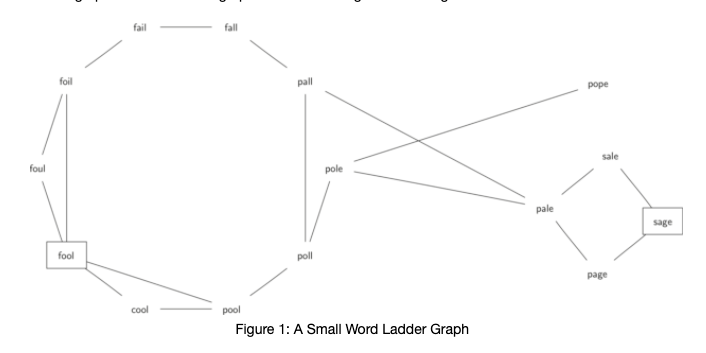

Suppose that we have a huge number of buckets, each of them with a four-letter word on the outside, except that one of the letters in the label has been replaced by an underscore. For example, consider Figure 2, we might have a bucket labeled “pop_.” As we process each word in our list we compare the word with each bucket, using the ‘_’ as a wildcard, so both “pope” and “pops” would match “pop_.” Every time we find a matching bucket, we put our word in that bucket. Once we have all the words in the appropriate buckets we know that all the words in the bucket must be connected.

In [6]:
def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    return g

# Implementing Breadth First Search

In [7]:
class Queue:
    def __init__(self):
        self.items = []
    def isEmpty(self):
        return self.items == []
    def enqueue(self, item):
        self.items.insert(0,item)
    def dequeue(self):
        return self.items.pop()
    def size(self):
        return len(self.items)
    
def bfs(g,start):
  start.setDistance(0)
  start.setPred(None)
  vertQueue = Queue()
  vertQueue.enqueue(start)
  while (vertQueue.size() > 0):
    currentVert = vertQueue.dequeue()
    for nbr in currentVert.getConnections():
      if (nbr.getColor() == 'white'):
        nbr.setColor('gray')
        nbr.setDistance(currentVert.getDistance() + 1)
        nbr.setPred(currentVert)
        vertQueue.enqueue(nbr)
    currentVert.setColor('black')

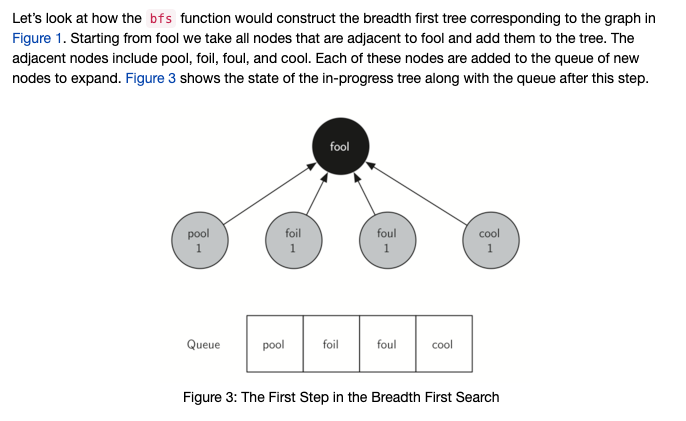



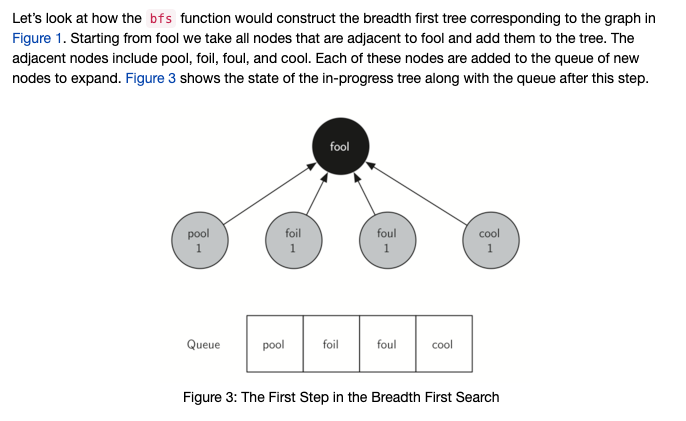

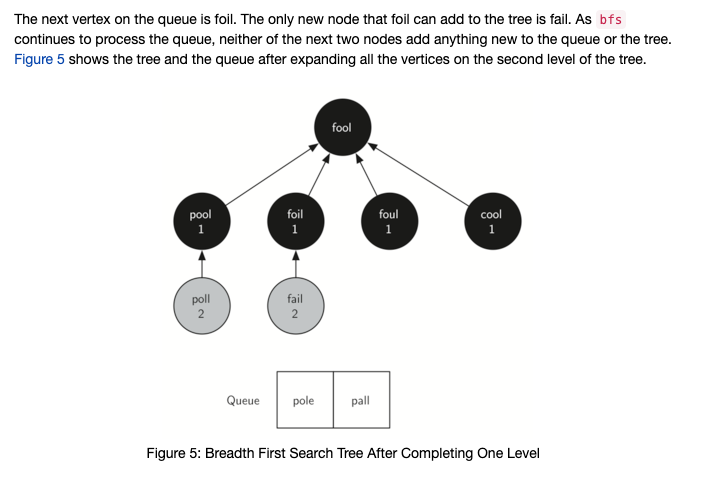

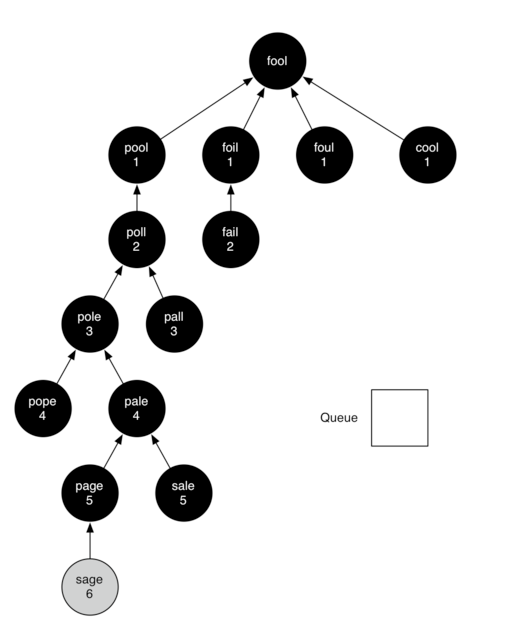

In [14]:
def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())

    
wordList = ["hot","dot","dog","lot","log","cog"]
g=buildGraph('/Users/bao/Desktop/logs/play_log.txt')

# traverse(g.getVertex('sage'))
bfs(g,'hot')

AttributeError: 'str' object has no attribute 'setDistance'